In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fid = drive.ListFile({'q':"title='rockpaperscissors.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('rockpaperscissors.zip')

In [4]:
f.keys()

dict_keys(['id', 'kind', 'etag', 'selfLink', 'webContentLink', 'alternateLink', 'embedLink', 'iconLink', 'title', 'mimeType', 'labels', 'copyRequiresWriterPermission', 'createdDate', 'modifiedDate', 'modifiedByMeDate', 'lastViewedByMeDate', 'markedViewedByMeDate', 'version', 'parents', 'downloadUrl', 'userPermission', 'originalFilename', 'fileExtension', 'md5Checksum', 'fileSize', 'quotaBytesUsed', 'ownerNames', 'owners', 'lastModifyingUserName', 'lastModifyingUser', 'capabilities', 'editable', 'copyable', 'writersCanShare', 'shared', 'explicitlyTrashed', 'appDataContents', 'headRevisionId', 'spaces'])

In [5]:
!unzip rockpaperscissors.zip

Archive:  rockpaperscissors.zip
   creating: rockpaperscissors/
   creating: rockpaperscissors/Test/
   creating: rockpaperscissors/Test/paper/
  inflating: rockpaperscissors/Test/paper/04l5I8TqdzF9WDMJ.png  
  inflating: rockpaperscissors/Test/paper/0a3UtNzl5Ll3sq8K.png  
  inflating: rockpaperscissors/Test/paper/0cb6cVL8pkfi4wF6.png  
 extracting: rockpaperscissors/Test/paper/0eqArS2GgsBeqgSn.png  
 extracting: rockpaperscissors/Test/paper/0Og76sl5CJhbxWWx.png  
  inflating: rockpaperscissors/Test/paper/0RA9rcrv8iVvuDDU.png  
  inflating: rockpaperscissors/Test/paper/0t08v9bAaA0mXGCQ.png  
  inflating: rockpaperscissors/Test/paper/0Uomd0HvOB33m47I.png  
  inflating: rockpaperscissors/Test/paper/0vugygEjxQJPr9yz.png  
  inflating: rockpaperscissors/Test/paper/0zKU6wEhT2cDe9j0.png  
  inflating: rockpaperscissors/Test/paper/14K62H4KG1hg5qiJ.png  
  inflating: rockpaperscissors/Test/paper/1Dfw5FRlS4h60JPX.png  
  inflating: rockpaperscissors/Test/paper/1fKclJk4eBWOQSR1.png  
  inflating

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm #buat adaiin progress barnya 

In [ ]:
PATH = '/content/rockpaperscissors'

In [9]:
os.listdir(PATH)

['Test', 'Train']

In [ ]:
train_dir = os.path.join(PATH,
                         'Train')
test_dir = os.path.join(PATH,
                        'Test')

In [ ]:
train_paper_dir = os.path.join(train_dir,
                                'paper')
train_rock_dir = os.path.join(train_dir,
                                   'rock')
train_scissor_dir = os.path.join(train_dir,
                               'scissor')

test_paper_dir = os.path.join(test_dir,
                               'paper')
test_rock_dir = os.path.join(test_dir,
                                  'rock')
test_scissor_dir = os.path.join(test_dir,
                              'scissor')

In [12]:
len(os.listdir(train_paper_dir))

534

#preparing data

In [ ]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 32

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    )

In [15]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

Found 1642 images belonging to 3 classes.


In [ ]:
image_gen_test = ImageDataGenerator(rescale=1./255)

In [17]:
test_data_gen = image_gen_test.flow_from_directory(batch_size=batch_size,
                                                   directory=test_dir,
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   class_mode='categorical')

Found 546 images belonging to 3 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
# Create images with white backgrounds
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

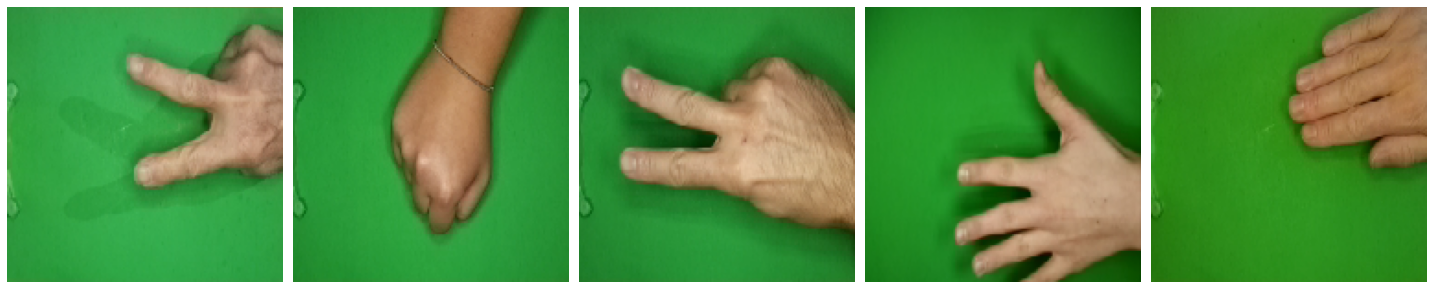

In [21]:
plotImages(sample_training_images[:5])

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [ ]:
batch_size = 32
epochs = 30

In [ ]:
num_paper_train = len(os.listdir(train_paper_dir))
num_rock_train = len(os.listdir(train_rock_dir))
num_scissor_train = len(os.listdir(train_scissor_dir))

num_paper_test = len(os.listdir(test_paper_dir))
num_rock_test = len(os.listdir(test_rock_dir))
num_scissor_test = len(os.listdir(test_scissor_dir))

total_train = num_paper_train + num_rock_train + num_scissor_train
total_test = num_paper_test + num_rock_test + num_scissor_test

In [ ]:
import tensorflow as tf

In [28]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = 20,
    epochs=12,
    validation_data=test_data_gen,
    validation_steps=total_test // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.01,
        patience=4
    )]
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
20/20 [==============================] - 20s 990ms/step - loss: 1.6143 - accuracy: 0.3406 - val_loss: 1.0419 - val_accuracy: 0.3235
Epoch 2/20
20/20 [==============================] - 19s 970ms/step - loss: 0.8141 - accuracy: 0.6562 - val_loss: 0.6590 - val_accuracy: 0.7960
Epoch 3/20
20/20 [==============================] - 19s 974ms/step - loss: 0.5410 - accuracy: 0.8203 - val_loss: 0.4803 - val_accuracy: 0.8419
Epoch 4/20
20/20 [==============================] - 19s 972ms/step - loss: 0.4021 - accuracy: 0.8531 - val_loss: 0.4297 - val_accuracy: 0.8548
Epoch 5/20
20/20 [==============================] - 19s 973ms/step - loss: 0.2664 - accuracy: 0.9141 - val_loss: 0.2882 - val_accuracy: 0.8934
Epoch 6/20
20/20 [==============================] - 19s 967ms/step - loss: 0.1808 - accuracy: 0.9422 - val_loss: 0.1743 - val_accuracy: 0.9504
Epoch 7/20
20/20 [==============================] - 19s 945ms/step

In [29]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

Saving DBvjNfYD7dv2f3gw.png to DBvjNfYD7dv2f3gw.png
[[0. 1. 0.]]
rock


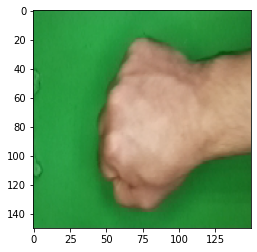

In [50]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(classes)
  if (classes==[[1., 0., 0.]]).all():
    print('paper')
  elif (classes==[[0., 1., 0.]]).all():
    print('rock')
  elif (classes==[[0., 0., 1.]]).all():
    print('scissors')

Saving dxFGJyDhnNu3iOmm.png to dxFGJyDhnNu3iOmm.png
[[0. 0. 1.]]
scissors


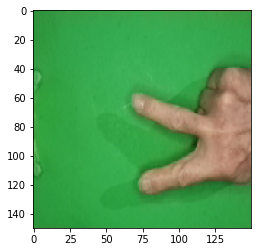

In [51]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(classes)
  if (classes==[[1., 0., 0.]]).all():
    print('paper')
  elif (classes==[[0., 1., 0.]]).all():
    print('rock')
  elif (classes==[[0., 0., 1.]]).all():
    print('scissors')

Saving coKLsdqkvkYUv247.png to coKLsdqkvkYUv247.png
[[1. 0. 0.]]
paper


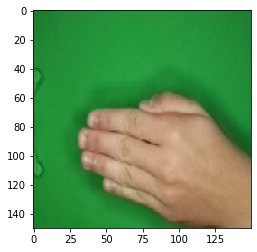

In [52]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(classes)
  if (classes==[[1., 0., 0.]]).all():
    print('paper')
  elif (classes==[[0., 1., 0.]]).all():
    print('rock')
  elif (classes==[[0., 0., 1.]]).all():
    print('scissors')